In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

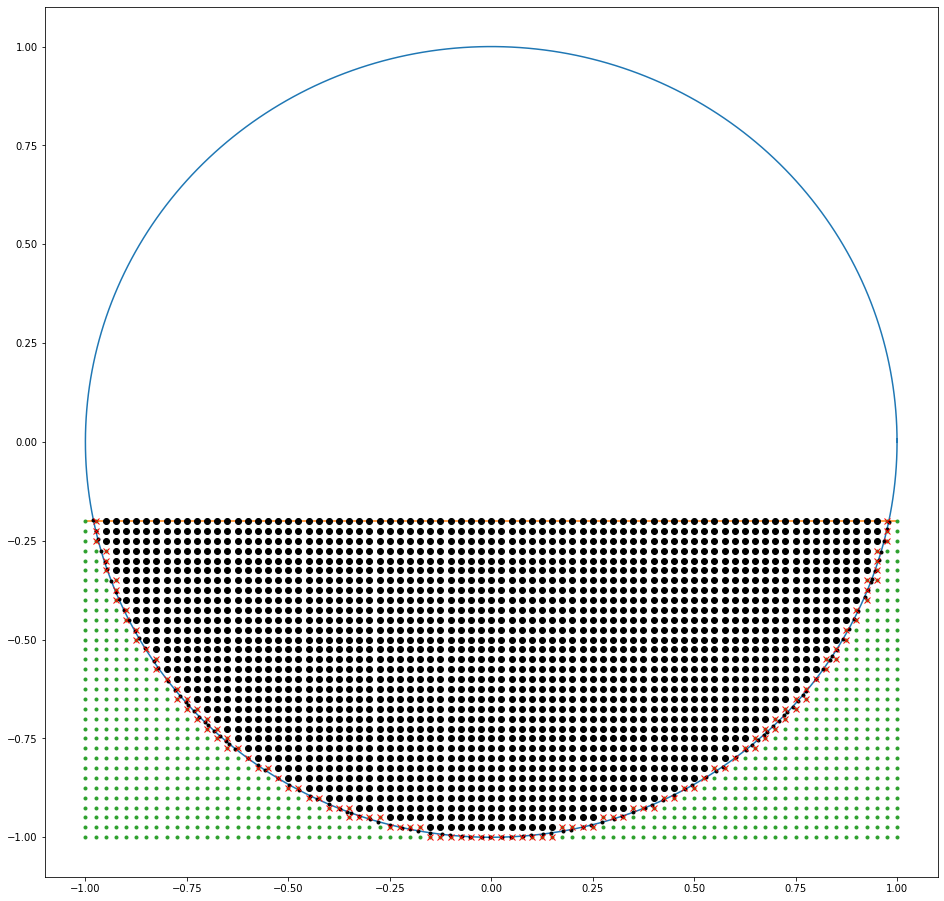

In [2]:
#define semicircle:

m=0
c = -0.2

plt.figure(figsize=(16,16))
dx = 0.025
xx,zz = np.meshgrid(np.arange(-1.0,1.0+dx,dx),np.arange(-1,dx+c,dx))

pi = 3.14159
dtheta = 0.01
theta = np.arange(0,pi*2+dtheta,dtheta)
xcircle = np.cos(theta)
zcircle = np.sin(theta)
plt.plot(xcircle,zcircle)
xbisection = np.arange(-1,1+0.01,0.01)
zbisection = m*xbisection + c
plt.plot(xbisection,zbisection)

#mapping square grid:
#Xgrid:
Xcircle = np.stack((xcircle,zcircle),axis=1)
Xbisection = np.stack
Xgrid = np.stack((xx.flatten(),zz.flatten()),axis=1)
plt.plot(Xgrid[:,0],Xgrid[:,1],'.')


#removing all points from Xgrid that are far away from the circle:

#distance from circle to points on grid:

r2 = (Xgrid[:,0:1]-Xcircle[:,0:1].transpose())**2 + (Xgrid[:,1:2]-Xcircle[:,1:2].transpose())**2

#finding closest point on circle to point on grid:

closest_point = np.argmin(r2,axis=1)


#finding the distance of all points to the boundary of the circle
boundary_buffer = 0.05
boundary_distance = (Xgrid[:,0] - Xcircle[closest_point,0])**2 + (Xgrid[:,1] - Xcircle[closest_point,1])**2
boundary_point = boundary_distance<(dx/2)**2
boundary_points = Xgrid[boundary_point,:]
#print(boundary_point)


#adjusting boundary points so that they lie on the circle:
boundary_closest_points = closest_point[boundary_point]

boundary_points = Xcircle[boundary_closest_points,:]
plt.plot(boundary_points[:,0],boundary_points[:,1],'.',color = 'k')

#finding all interior points:
epsilon = 1e-5
interior_points = Xgrid[Xgrid[:,0]**2+Xgrid[:,1]**2<(1-dx/2)**2]
plt.plot(interior_points[:,0],interior_points[:,1],'o',color = 'k')
plt.plot(Xgrid[boundary_point,0],Xgrid[boundary_point,1],'x',color = 'r')

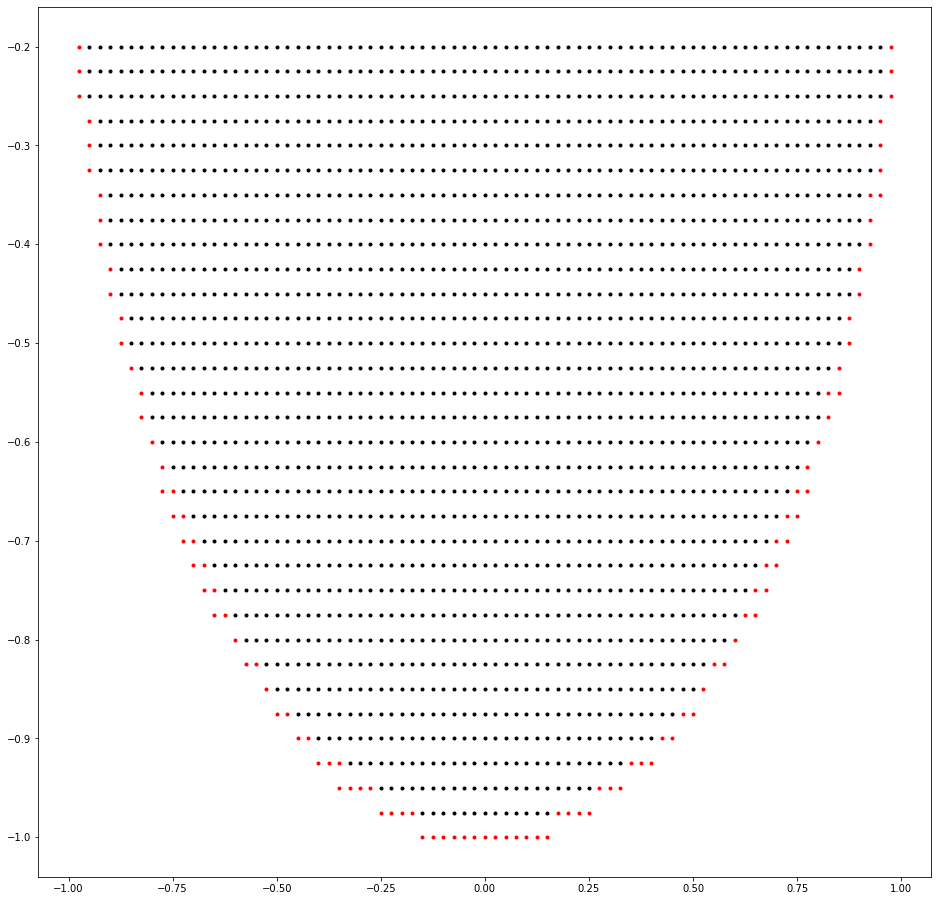

In [7]:
plt.figure(figsize=(16,16))
plt.plot(interior_points[:,0],interior_points[:,1],'.',color = 'k')
#plt.plot(boundary_points[:,0],boundary_points[:,1],'.',color = 'r')
plt.plot(Xgrid[boundary_point,0],Xgrid[boundary_point,1],'.',color = 'r')
#shifting boundary points to be more spread out:

#finding nearest neighbour for each point

